In [31]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import datetime
import seaborn as sns
import pyproj
from scipy import interpolate

In [32]:
# it = xr.open_dataset('/Users/kyra/documents/Summer23/shout/mergedicethickness92.nc')
# it = it.h
# print(it)

ts = xr.open_dataset('/Users/kyra/documents/Summer23/shout/totimerge.nc')
ts_toti = ts.toti
print(ts_toti)

ts2 = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/totimerged.nc')
ts2 = ts2.toti

<xarray.DataArray 'toti' (time: 1250)>
[1250 values with dtype=float32]
Coordinates:
  * time     (time) float32 100.0 200.0 300.0 ... 1.248e+05 1.249e+05 1.25e+05
Attributes:
    long_name:       ice volume
    units:           m3
    FORTRAN_format:  e13.5


In [33]:
na = df.to_numpy()
forc_time = na[1750:3000, 0]
co2 = na[1750:3000, 1]
d180 = na[1750:3000, 2]
eccentricity = na[1750:3000, 3]
obliquity = na[1750:3000, 4]
precession = na[1750:3000, 5]

ice_time = np.arange(125,0,-0.1)
forc_time = na[1750:3000, 0]

f_linear = interpolate.interp1d(forc_time, co2, kind='linear')
re_co2 = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, d180, kind='linear')
re_d180 = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, eccentricity, kind='linear')
re_ec = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, obliquity, kind='linear')
re_ob = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, precession, kind='linear')
re_pr = f_linear(ice_time+1)

PearsonRResult(statistic=-0.7932647635785882, pvalue=0.0)


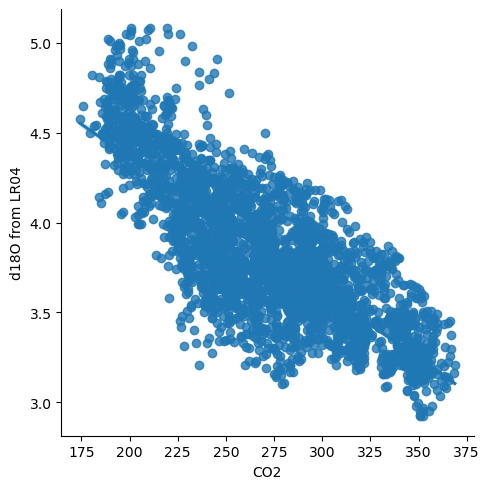

In [41]:
df = pd.read_csv('/Users/kyra/documents/Summer23/pCESM.3Ma_CO2_d18O_obPara.txt', delim_whitespace=True, header=None)
df.columns = ['Kiloyear', 'CO2','d18O from LR04','Eccentricity','Obliquity','Precession']
df.head()

#sns.scatterplot(x="CO2", y="d18O from LR04", data=df, color='g')
sns.lmplot(x="CO2", y="d18O from LR04", data=df)

from scipy import stats
ccf = stats.pearsonr(df['CO2'], df['d18O from LR04'])
print(ccf)

PearsonRResult(statistic=-0.6628355188542407, pvalue=5.189796776761108e-159)


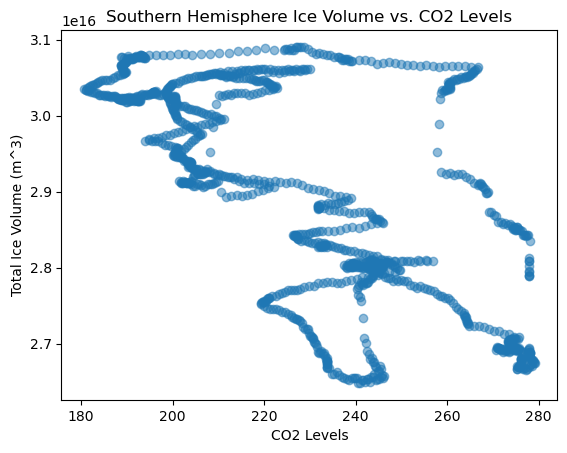

PearsonRResult(statistic=-0.8842687788867297, pvalue=0.0)


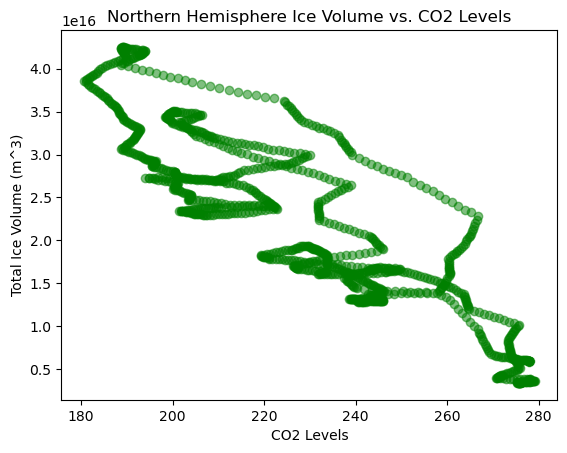

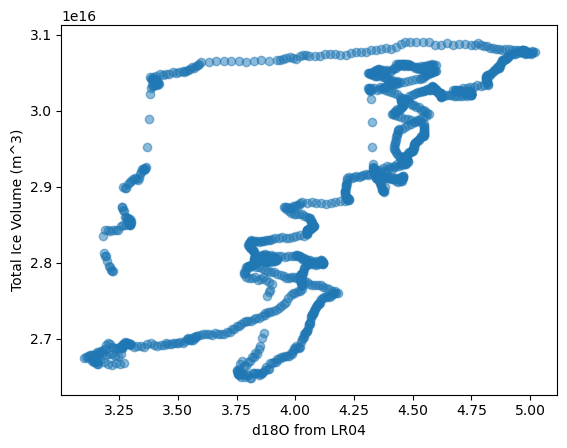

PearsonRResult(statistic=0.6971069106184669, pvalue=1.4899966896537529e-182)


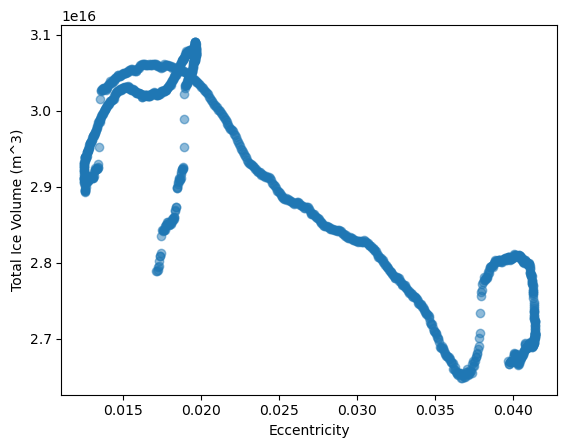

PearsonRResult(statistic=-0.846887316642556, pvalue=0.0)


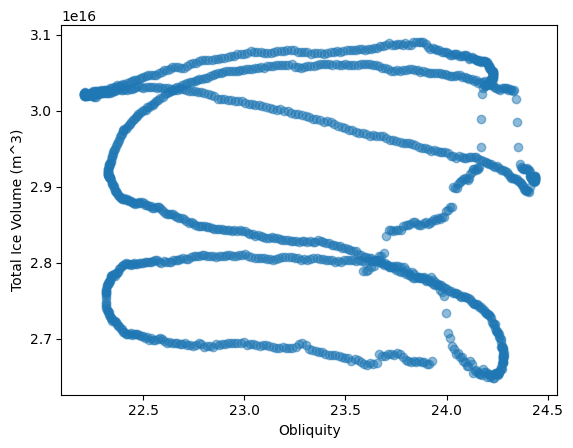

PearsonRResult(statistic=-0.08787951413389958, pvalue=0.0018713809082158248)


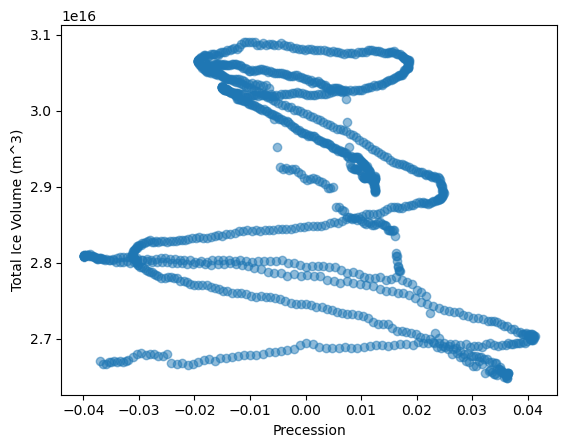

PearsonRResult(statistic=-0.238115699630128, pvalue=1.422712299290529e-17)


<Figure size 640x480 with 0 Axes>

In [42]:
import numpy as np
import matplotlib.pyplot as plt

#1st scatterplot
x = re_co2
y = ts_toti
plt.scatter(x, y, alpha=0.5)
plt.ylabel('Total Ice Volume (m^3)')
plt.xlabel('CO2 Levels')
plt.title('Southern Hemisphere Ice Volume vs. CO2 Levels')
ccf = stats.pearsonr(x, y)
print(ccf)
plt.show()

#1st scatterplot
x_ = re_co2
y_ = ts2
plt.scatter(x_, y_, alpha=0.5, color = 'g')
plt.ylabel('Total Ice Volume (m^3)')
plt.xlabel('CO2 Levels')
plt.title('Northern Hemisphere Ice Volume vs. CO2 Levels')
ccf_ = stats.pearsonr(x_, y_)
print(ccf_)
plt.show()

#2nd scatterplot
x2 = re_d180
y2 = ts_toti[0:1250]

plt.scatter(x2, y2, alpha=0.5)
plt.ylabel('Total Ice Volume (m^3)')
plt.xlabel('d18O from LR04')
ccf2 = stats.pearsonr(x2, y2)
plt.show()
print(ccf2)

#3rd scatterplot
x3 = re_ec
y3 = ts_toti[0:1250]

plt.scatter(x3, y3, alpha=0.5)
plt.ylabel('Total Ice Volume (m^3)')
plt.xlabel('Eccentricity')
ccf3 = stats.pearsonr(x3, y3)
plt.show()
print(ccf3)

#4th scatterplot
x4 = re_ob
y4 = ts_toti[0:1250]

plt.scatter(x4, y4, alpha=0.5)
plt.ylabel('Total Ice Volume (m^3)')
plt.xlabel('Obliquity')
ccf4 = stats.pearsonr(x4, y4)
plt.show()
print(ccf4)

#5th scatterplot
x5 = re_pr
y5 = ts_toti[0:1250]

plt.scatter(x5, y5, alpha=0.5)
plt.ylabel('Total Ice Volume (m^3)')
plt.xlabel('Precession')
ccf5 = stats.pearsonr(x5, y5)
plt.show()
print(ccf5)

plt.tight_layout()